In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
# Set random seed
np.random.seed(42)

# Generate data for 3 classes with distinct mean shifts
class1 = np.random.normal(loc=0, scale=1, size=(20, 50))
class2 = np.random.normal(loc=3, scale=1, size=(20, 50))
class3 = np.random.normal(loc=-3, scale=1, size=(20, 50))

X = np.vstack([class1, class2, class3])
y_true = np.array([0]*20 + [1]*20 + [2]*20)


# ### (b) Perform PCA and plot first two principal components

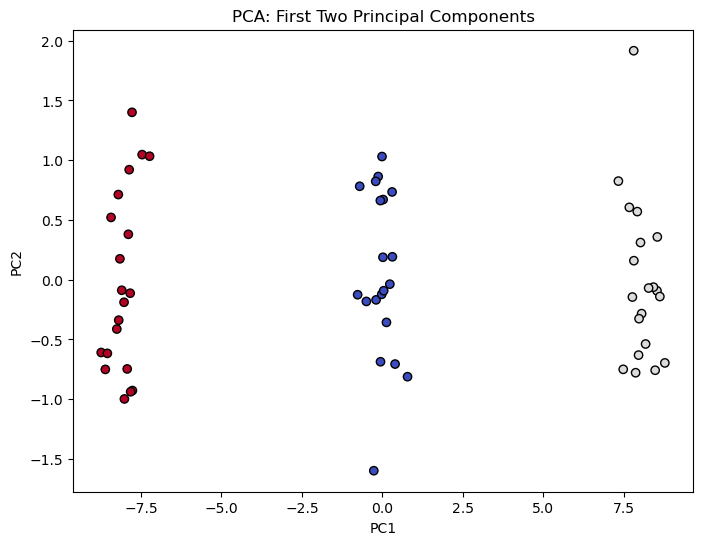

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_true, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("PCA: First Two Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


# ### (c) Perform K-means clustering with K=3 and compare to true labels

In [4]:
kmeans_3 = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
k3_labels = kmeans_3.labels_

comparison_3 = pd.crosstab(y_true, k3_labels)
print("\nK=3 Clustering Comparison:\n", comparison_3)



K=3 Clustering Comparison:
 col_0   0   1   2
row_0            
0       0   0  20
1      20   0   0
2       0  20   0


c:\Users\Aidan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# ### (d) Perform K-means clustering with K=2

In [5]:
kmeans_2 = KMeans(n_clusters=2, random_state=42).fit(X_scaled)
k2_labels = kmeans_2.labels_
comparison_2 = pd.crosstab(y_true, k2_labels)
print("\nK=2 Clustering Comparison:\n", comparison_2)



K=2 Clustering Comparison:
 col_0   0   1
row_0        
0       0  20
1      20   0
2       0  20


c:\Users\Aidan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# ### (e) Perform K-means clustering with K=4

In [6]:
kmeans_4 = KMeans(n_clusters=4, random_state=42).fit(X_scaled)
k4_labels = kmeans_4.labels_
comparison_4 = pd.crosstab(y_true, k4_labels)
print("\nK=4 Clustering Comparison:\n", comparison_4)


K=4 Clustering Comparison:
 col_0  0   1   2   3
row_0               
0      0   0  20   0
1      8   0   0  12
2      0  20   0   0


c:\Users\Aidan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# ### (f) Perform K-means clustering on the first two principal components with K=3

In [7]:
kmeans_pca = KMeans(n_clusters=3, random_state=42).fit(X_pca)
k_pca_labels = kmeans_pca.labels_
comparison_pca = pd.crosstab(y_true, k_pca_labels)
print("\nK=3 on PCA components Comparison:\n", comparison_pca)



K=3 on PCA components Comparison:
 col_0   0   1   2
row_0            
0       0   0  20
1      20   0   0
2       0  20   0


c:\Users\Aidan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# ### (g) Scale each variable to have standard deviation 1 and run K-means with K=3


In [8]:
# Already scaled with StandardScaler before PCA, so clustering on X_scaled
kmeans_scaled = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
k_scaled_labels = kmeans_scaled.labels_
comparison_scaled = pd.crosstab(y_true, k_scaled_labels)
print("\nK=3 Clustering after Standard Scaling Comparison:\n", comparison_scaled)





K=3 Clustering after Standard Scaling Comparison:
 col_0   0   1   2
row_0            
0       0   0  20
1      20   0   0
2       0  20   0


c:\Users\Aidan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
# Show explained variance ratio for PCA
print("\nExplained Variance Ratio by PCA:", pca.explained_variance_ratio_)



Explained Variance Ratio by PCA: [0.86925829 0.00943817]
